In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [6]:
data =  pd.read_csv(r"C:\Users\ShePlay\Documents\GitHub\handson-ml2-master\handson-ml2-master\datasets\lbf\lbf_historical_stats.csv")
data.head()

,temporada,torneo,posicion,club,jj,jg,je,jp,gf,gc,...,dif2,pts2,jj3,jg3,je3,jp3,gf3,gc3,dif3,pts3
0,2019-2020,Apertura,19,Necaxa,18,1,3,14,6,35,...,-9,5,9,0,1,8,0,20,-20,1
1,2022-2023,Apertura,9,Pumas,17,7,3,7,30,36,...,9,14,9,3,1,5,12,27,-15,10
2,2018-2019,Apertura,1,Tigres,16,12,4,0,51,19,...,17,18,8,7,1,0,26,11,15,22
3,2018-2019,Apertura,2,Pachuca,16,12,2,2,31,14,...,10,21,8,5,2,1,16,9,7,17
4,2018-2019,Apertura,3,América,16,11,2,3,28,12,...,7,18,8,5,2,1,15,6,9,17


In [7]:
print(data.isnull().sum())

temporada    0
torneo       0
posicion     0
club         0
jj           0
jg           0
je           0
jp           0
gf           0
gc           0
dif          0
pts          0
jj2          0
jg2          0
je2          0
jp2          0
gf2          0
gc2          0
dif2         0
pts2         0
jj3          0
jg3          0
je3          0
jp3          0
gf3          0
gc3          0
dif3         0
pts3         0
dtype: int64


In [8]:
features=['jj', 'jg', 'je', 'jp', 'gf', 'gc', 'dif', 'pts']
X=data[features]
y=data['posicion']

In [9]:
X.head()

,jj,jg,je,jp,gf,gc,dif,pts
0,18,1,3,14,6,35,-29,6
1,17,7,3,7,30,36,-6,24
2,16,12,4,0,51,19,32,40
3,16,12,2,2,31,14,17,38
4,16,11,2,3,28,12,16,35


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 3.5463067500740286
Mean Absolute Error: 1.266331018615415


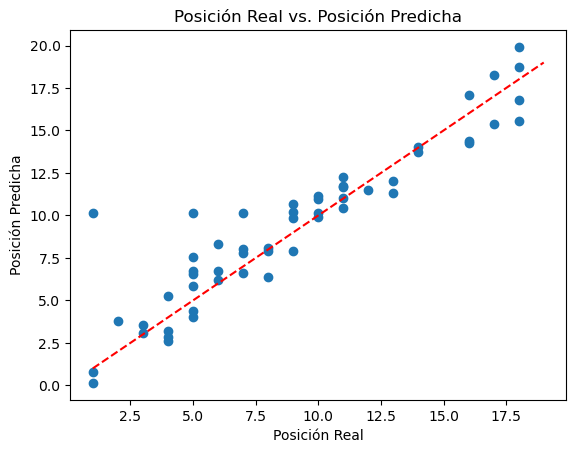

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Posición Real')
plt.ylabel('Posición Predicha')
plt.title('Posición Real vs. Posición Predicha')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [18]:


# Obtener la lista de clubes únicos
clubs = data['club'].unique()
print("Clubes disponibles:")
for club in clubs:
    print(club)

# Solicitar al usuario que seleccione un club
selected_club = input("Selecciona un club: ")

# Filtrar los datos para el club seleccionado
club_data = data[data['club'] == selected_club]

# Verificar si hay datos disponibles para el club seleccionado
if club_data.empty:
    print("No hay datos disponibles para el club seleccionado.")
else:
    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=club_data, x='posicion', y='posicion_predicha', color='blue', label='Predicción')
    plt.plot([club_data['posicion'].min(), club_data['posicion'].max()], 
             [club_data['posicion'].min(), club_data['posicion'].max()], 
             'r--', label='Línea de Igualdad')
    plt.title(f'Predicción de Posición para {selected_club}')
    plt.xlabel('Posición Real')
    plt.ylabel('Posición Predicha')
    plt.legend()
    plt.grid(True)
    plt.show()

Clubes disponibles:
Necaxa
Pumas
Tigres
Pachuca
América
Guadalajara
Rayadas
Toluca
Atlas
Puebla
León
Querétaro
Lobos BUAP
M. Morelia
Veracruz
Tijuana
Cruz Azul
Santos Laguna
Atlético de San Luis
FC Juárez
Mazatlán FC


Selecciona un club:  América


ValueError: Could not interpret value `posicion_predicha` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>